In [1]:
import torch
import torchvision
from torchvision import datasets, transforms, models

ModuleNotFoundError: No module named 'torch'

In [20]:
transform = transforms.Compose([transforms.Resize(32),
                                       transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root='./leapGestRecog/00', transform=transform)

for folder in range(9):
    root = './leapGestRecog/0' + str(folder)
    trainset_folder = torchvision.datasets.ImageFolder(root=root, transform=transform)
    torch.utils.data.ConcatDataset((trainset, trainset_folder))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

classes = ('01_palm', '02_l', '03_fist', '04_fist_moved',
           '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down')

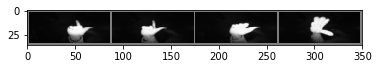

 02_l  02_l 05_thumb 10_down


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))